In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [19]:
# Functions

def symbol_to_path(symbol, base_dir = 'data'):
    '''Return CSV file path given ticker symbol'''
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

def get_data(symbols, dates):
    '''Read stock data (adjusted close) given symbols, from CSV files'''
    df = pd.DataFrame(index = dates)
    if 'SPY' not in symbols:  # Add SPY for reference, if absent
        symbols.insert(0,'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), 
                          index_col = 'Date', 
                          parse_dates = True, 
                          usecols = ['Date', 'Adj Close'], 
                          na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': # drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])
    return df

def plot_data(df, title = 'Stock prices', ylabel = 'Price'):
    '''Plot stock prices'''
    ax = df.plot(title = title, fontsize = 12)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    plt.show()
    
def get_bollinger_bands(rm, rstd):
    '''Return upper and lower Bollinger bands'''
    upper_band = rm + 2 * rstd
    lower_band = rm - 2 * rstd
    return upper_band, lower_band

def get_rolling_mean(df, window):
    return pd.rolling_mean(df, window = window)

def get_rolling_std(df, window):
    return pd.rolling_std(df, window = window)

def compute_daily_returns(df):
    '''Compute and return daily return values using pandas'''
    daily_returns = (df / df.shift(1)) - 1 # pandas shifts *back*
    daily_returns.ix[0,:] = 0 # pandas puts NaNs in row 0
    return daily_returns

def compute_cumulative_returns(df):
    '''Compute and return cumulative return values'''
    cum_returns = df.copy() # copy dataframe to match size, rows and columns
    cum_returns = (df/df.ix[0,:].values) - 1
    return cum_returns

In [ ]:
# kurtosis
# measure of how different the tails of the distribution
# are from a gaussian.  Tails are usually fatter in a daily
# return distribution. Postive = fat tails; negative = skinny
# tails.

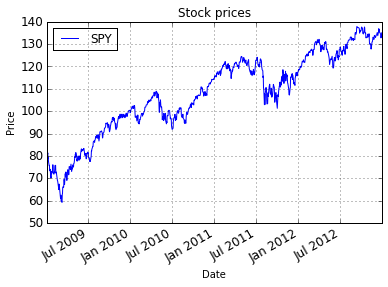

In [3]:

dates = pd.date_range('2009-01-01', '2012-12-31')

symbols = ['SPY']

df = get_data(symbols, dates)
plot_data(df)


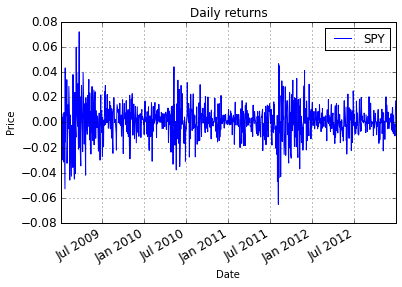

In [7]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title = 'Daily returns')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103666050>]], dtype=object)

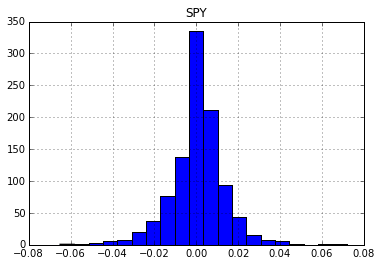

In [9]:
daily_returns.hist(bins = 20)

mean= 0.000593568696119
std= 0.0130325892849


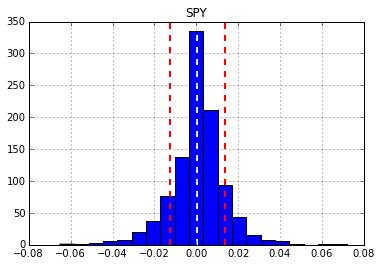

In [13]:
# Get mean and standard deviation

mean = daily_returns['SPY'].mean()
print 'mean=', mean
std = daily_returns['SPY'].std()
print 'std=', std
daily_returns.hist(bins = 20)
plt.axvline(mean, color = 'w', linestyle = 'dashed', linewidth = 2)
plt.axvline(mean + std, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(mean - std, color = 'r', linestyle = 'dashed', linewidth = 2)


In [15]:
# computer kurtosis

print daily_returns.kurtosis()

SPY    3.408585
dtype: float64


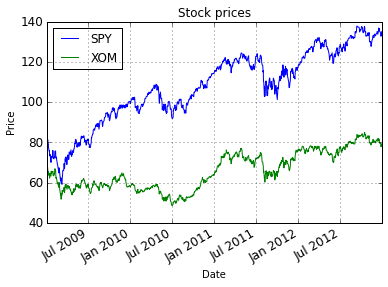

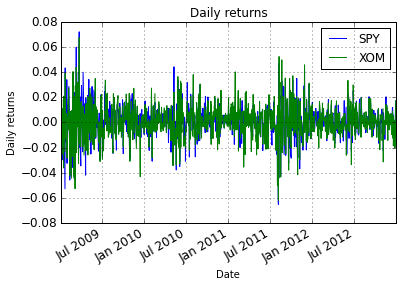

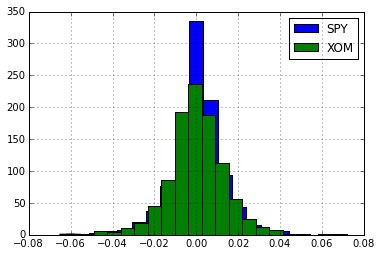

In [22]:
# plot 2 histograms

dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM']

df = get_data(symbols, dates)
plot_data(df)

# compute daily returns

daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title = 'Daily returns', ylabel = 'Daily returns')
daily_returns['SPY'].hist(bins = 20, label = 'SPY')
daily_returns['XOM'].hist(bins = 20, label = 'XOM')
plt.legend(loc = 'upper right')

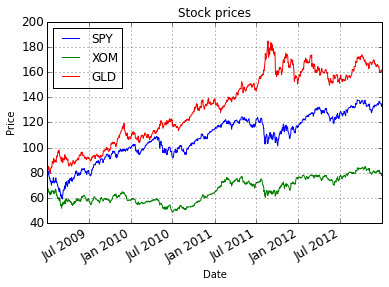

XOM beta: 0.855601223961
XOM alpha: -0.000260218654134
GLD beta: 0.0679065782741
GLD alpha: 0.000654086721099
          SPY       XOM       GLD
SPY  1.000000  0.821369  0.076348
XOM  0.821369  1.000000  0.080527
GLD  0.076348  0.080527  1.000000


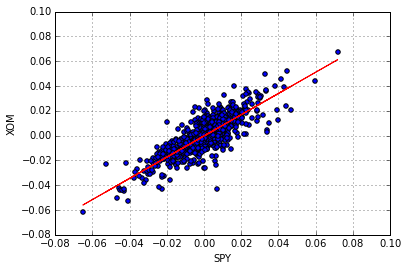

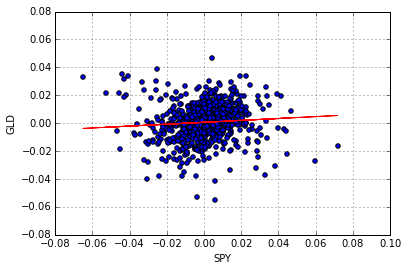

In [30]:
# Scatter plots

dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GLD']

df = get_data(symbols, dates)
plot_data(df)

daily_returns = compute_daily_returns(df)
daily_returns.plot(kind = 'scatter', x = 'SPY', y = 'XOM')
beta_XOM, alpha_XOM = np.polyfit(daily_returns['SPY'], 
                                 daily_returns['XOM'],1)
print 'XOM beta:', beta_XOM
print 'XOM alpha:', alpha_XOM
plt.plot(daily_returns['SPY'], beta_XOM * daily_returns['SPY'] 
         + alpha_XOM, '-', color = 'r')

daily_returns.plot(kind = 'scatter', x = 'SPY', y = 'GLD')
beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], 
                                 daily_returns['GLD'],1)
print 'GLD beta:', beta_GLD
print 'GLD alpha:', alpha_GLD
plt.plot(daily_returns['SPY'], beta_GLD * daily_returns['SPY'] 
         + alpha_GLD, '-', color = 'r')

print daily_returns.corr(method = 'pearson')